In [1]:
import numpy as np
from scipy import io
from libs.utils import read_int16_as_float32, write__float32_as_int16, calcurate_SNR
from libs.stft import stft, synth
%matplotlib inline
import matplotlib.pyplot as plt
from libs.utils import down_sampling
import IPython.display as ipd

In [2]:
def conv_imp(target_wav, chs=[3,4], degree='270'):
    impfile = 'MIRD/Impulse_response_Acoustic_Lab_Bar-Ilan_University_(Reverberation_0.160s)_3-3-3-8-3-3-3_1m_{}.mat'.format(degree)
    matdata = io.loadmat(impfile,squeeze_me=True)
    imp_mat = matdata["impulse_response"]
    imps = [down_sampling(imp_mat[200:7000,ch], 48000, 16000) for ch in chs]
    #imps = [imp_mat[200:10000,ch] for ch in chs]
    #plt.figure();plt.plot(imps[0])
    target_wavs=[]
    for imp, ch in zip(imps, chs):
        target_wavs.append(np.convolve(target_wav, imp))
    return np.array(target_wavs)

def calc_noise_coeff(noise, voice, snr, vad=None, ratio=1):
    if vad is None:
        vad = np.ones(len(noise))
    coeff =  1.0 / np.linalg.norm(noise) * \
             np.linalg.norm(voice[vad > 0] * ratio) / 10.0 ** (0.05 * snr)
    return coeff

def make_noisy(angles, snr):
    noise_wav = read_int16_as_float32('MIRD/{}.wav'.format('09'), 16000)
    clean_wav = read_int16_as_float32('MIRD/nf001001.wav', 16000)
    clean_multi = conv_imp(clean_wav, chs=[3,4], degree='000')
    noises_multi = np.zeros(clean_multi.shape)
    for angle in angles:
        noise_multi = conv_imp(noise_wav, chs=[3,4], degree='{:03}'.format(360-angle))
        noise_multi = noise_multi[:,:clean_multi.shape[1]]
        noises_multi = noises_multi + noise_multi
    coeff = calc_noise_coeff(noises_multi[0,:], clean_multi[0,:], snr)
    noisy_multi = clean_multi + noises_multi * coeff
    #noisy_multi = noises_multi * coeff
    return noisy_multi, clean_wav

In [3]:
x, clean_wav=make_noisy([90], -10)

/Users/InaTommi/miniconda3/lib/python3.5/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]
/Users/InaTommi/miniconda3/lib/python3.5/site-packages/scipy/signal/signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


In [4]:
ipd.Audio(x,rate=16000)

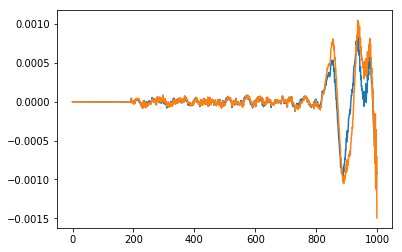

In [5]:
plt.plot(x[0,:1000])
plt.plot(x[1,:1000])

In [6]:
xch1 = x[0,:]
xch2 = x[1,:]
XCH1, paramch1 = stft(xch1)
XCH2, paramch2 = stft(xch2)

In [7]:
ipd.Audio(xch1,rate=16000)

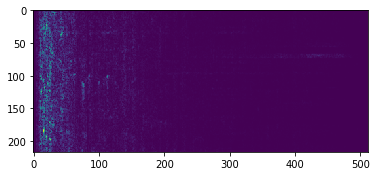

In [8]:
plt.imshow(np.abs(XCH1))

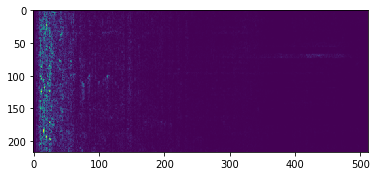

In [9]:
plt.imshow(np.abs(XCH2))

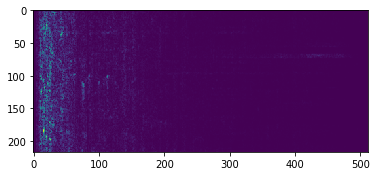

In [10]:
plt.imshow(np.abs(XCH1))

In [11]:
def vectormake(hfftl, num_mic=2, MicInterval = 0.08, tgt_angle=np.pi/2, sv = 340, fs = 16000):
    f= 16000/((hfftl-1)*2)*np.array([i for i in range (hfftl)])
    omega = 2*np.pi*f
    tau = MicInterval*np.sin(tgt_angle)/340
    return np.array([np.exp(-1j*omega*tau*m) for m in range (num_mic)])

(512, 2)

(217, 512)

(217, 512)

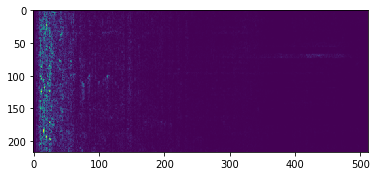

ImportError: No module named 'mir_eval'